###**Classifying Alcoholic and Control group from the data**

Here, we have 10 alcoholic and 10 control group subjects. Each subject was exposed to different stimulus situation. In the data preparation, we created a dataset with proper formatting.

Now, we use this data to predict alcoholic and control group subject using basic shallow neural network and creating 2 dimension data from all channels and then using convolutional neural network. Details of each neural network will be describe later as required.

Importing intial libraries...

In [1]:
import pandas as pd
import glob
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

In [2]:
# Path to main directory in linked shared drive. Change it according to requirement.
main_dir = 'drive/My Drive/Data/EEG_project/'

In [3]:
# Make list of all csv files to use it later to combine.
fname = []
for file_name in glob.glob(main_dir+'csv/*.csv'):
    fname.append(file_name)

In [5]:
# Create a combined dataframe using all csv files.
df_new = pd.DataFrame()
for i in range(len(fname)):
    path = fname[i]
    df1 = pd.read_csv(path, delimiter = '\t')
    df_new = df_new.append(df1)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [6]:
# Print the dataframe to visualize data int abluar format.
df_new

,trial_num,chan_name,epoch,voltage,subject_id,stimulus,alcoholic
0,25,FP1,0,-77.291,co2a0000371,S2 match,True
1,25,FP1,1,22.319,co2a0000371,S2 match,True
2,25,FP1,2,63.822,co2a0000371,S2 match,True
3,25,FP1,3,-9.420,co2a0000371,S2 match,True
4,25,FP1,4,-99.264,co2a0000371,S2 match,True
...,...,...,...,...,...,...,...
16379,19,Y,251,-13.438,co2a0000371,S2 nomatch,True
16380,19,Y,252,-11.973,co2a0000371,S2 nomatch,True
16381,19,Y,253,-11.973,co2a0000371,S2 nomatch,True
16382,19,Y,254,-13.438,co2a0000371,S2 nomatch,True


In [7]:
# Create list od all subject ids, channel names, and epochs
sid = df_new['subject_id'].unique()
chan = df_new['chan_name'].unique()
epoch = df_new['epoch'].unique()

**1. Shallow Neural Network:**

In this simple neural network, we will create single layer neural network.
The process to this model is as follows:



*   Prepare data as per our requirements.

  *   The dataframe should only has channels data as columns, epochs as rows and the last column as target variables. In our case, target variable will be Boolean. Alcoholic - True or False

*   Divide data into 80-20 part for training and testing respectively.

*   Create single layer sequential model using Keras libraries
*   Train and Test the model





In [8]:
# Create Empty dataframe for our shallow neural network model.
df_data = pd.DataFrame(columns=chan)
df_data['FP1'] = [None]*int(len(df_new)/len(chan))
df_data['class'] = [None]*int(len(df_new)/len(chan))

In [9]:
#df_data

In [10]:
# Filling out empty dataframe with our data. This will be our core dataset for this experiment.
n = 0
for i in range(len(sid)):
  temp1 = df_new[df_new['subject_id'] == sid[i]]
  trl = temp1['trial_num'].unique()
  for j in range(len(trl)):
    temp2 = temp1[temp1['trial_num'] == trl[j]]
    for k in range(len(epoch)):
      temp3 = temp2[temp2['epoch'] == epoch[k]]
      temp3 = temp3.reset_index(drop=True)
      df_data.loc[n][:-1] = temp3['voltage']
      df_data['class'][n] = temp3['alcoholic'][0]
      n += 1
      print(n)

Streaming output truncated to the last 5000 lines.
148602
148603
148604
148605
148606
148607
148608
148609
148610
148611
148612
148613
148614
148615
148616
148617
148618
148619
148620
148621
148622
148623
148624
148625
148626
148627
148628
148629
148630
148631
148632
148633
148634
148635
148636
148637
148638
148639
148640
148641
148642
148643
148644
148645
148646
148647
148648
148649
148650
148651
148652
148653
148654
148655
148656
148657
148658
148659
148660
148661
148662
148663
148664
148665
148666
148667
148668
148669
148670
148671
148672
148673
148674
148675
148676
148677
148678
148679
148680
148681
148682
148683
148684
148685
148686
148687
148688
148689
148690
148691
148692
148693
148694
148695
148696
148697
148698
148699
148700
148701
148702
148703
148704
148705
148706
148707
148708
148709
148710
148711
148712
148713
148714
148715
148716
148717
148718
148719
148720
148721
148722
148723
148724
148725
148726
148727
148728
148729
148730
148731
148732
148733
148734
148735
148736
1487

In [ ]:
"""
temp1 = df_new[df_new['subject_id'] == sid[0]]
trl = temp1['trial_num'].unique()
temp2 = temp1[temp1['trial_num'] == trl[0]]
temp3 = temp2[temp2['epoch'] == epoch[0]]
temp3 = temp3.reset_index(drop=True)
"""

In [ ]:
#temp3

,trial_num,chan_name,epoch,voltage,subject_id,stimulus,alcoholic
0,25,FP1,0,-77.291,co2a0000371,S2 match,True
1,25,FP2,0,0.671,co2a0000371,S2 match,True
2,25,F7,0,-3.082,co2a0000371,S2 match,True
3,25,F8,0,5.046,co2a0000371,S2 match,True
4,25,AF1,0,4.100,co2a0000371,S2 match,True
...,...,...,...,...,...,...,...
59,25,P2,0,0.102,co2a0000371,S2 match,True
60,25,P1,0,-1.343,co2a0000371,S2 match,True
61,25,CPZ,0,-0.916,co2a0000371,S2 match,True
62,25,nd,0,3.387,co2a0000371,S2 match,True


In [ ]:
#temp3['voltage'].T

0    -77.291
1      0.671
2     -3.082
3      5.046
4      4.100
       ...  
59     0.102
60    -1.343
61    -0.916
62     3.387
63    -0.580
Name: voltage, Length: 64, dtype: float64

In [ ]:
#df_data.loc[0] = temp3['voltage']

In [11]:
df_data

,FP1,FP2,F7,F8,AF1,AF2,FZ,F4,F3,FC6,FC5,FC2,FC1,T8,T7,CZ,C3,C4,CP5,CP6,CP1,CP2,P3,P4,PZ,P8,P7,PO2,PO1,O2,O1,X,AF7,AF8,F5,F6,FT7,FT8,FPZ,FC4,FC3,C6,C5,F2,F1,TP8,TP7,AFZ,CP3,CP4,P5,P6,C1,C2,PO7,PO8,FCZ,POZ,OZ,P2,P1,CPZ,nd,Y,class
0,-77.291,0.671,-3.082,5.046,4.1,6.022,3.387,3.153,2.848,4.303,0.58,0.997,1.658,-7.426,-0.641,-1.79,-1.231,-2.543,-3.153,-2.523,-1.312,-1.017,-1.76,0.315,-2.116,-6.795,-0.61,-3.723,-1.424,-3.143,1.007,6.51,2.004,7.985,2.136,5.89,2.726,0.916,5.066,2.085,1.801,4.018,-0.295,3.357,2.787,-0.621,0.264,4.517,-0.997,-0.58,-1.119,-0.346,-0.275,-0.692,-0.071,-4.832,1.149,-1.902,-2.299,0.102,-1.343,-0.916,3.387,-0.58,True
1,22.319,2.625,-3.082,3.092,4.1,5.046,2.899,2.665,2.36,3.326,0.58,0.997,1.17,-3.52,-0.153,7.487,-5.137,-5.473,-6.571,2.36,-1.312,-1.506,-1.272,-2.126,-2.604,-5.33,0.854,-6.165,-1.912,-6.073,1.495,6.51,3.469,6.032,1.648,4.425,0.773,4.333,3.601,-0.356,2.289,1.088,-0.783,2.869,2.787,-5.503,3.682,4.028,-1.485,-2.045,-1.119,-2.787,-0.275,-0.692,-1.048,-8.25,0.661,-3.367,-1.811,-0.875,-1.343,-0.427,2.899,1.373,True
2,63.822,4.089,-1.617,2.604,4.1,3.581,2.899,1.2,2.848,0.885,0.58,0.509,0.682,4.293,-1.129,16.764,1.699,-0.59,0.264,-2.523,-1.312,-1.994,-1.76,-4.567,-2.604,-0.936,-0.122,-5.188,-3.377,-6.561,0.031,6.999,3.957,2.614,1.648,1.495,-3.133,6.287,4.089,-2.309,2.289,-2.33,-1.272,1.892,2.787,-5.015,3.682,3.54,-1.485,-2.533,-2.096,-4.74,-0.275,-1.18,-2.513,-7.273,0.661,-3.855,-0.834,-1.851,-2.319,-0.427,2.899,3.326,True
3,-9.42,4.089,1.801,2.116,4.1,3.092,2.899,0.224,2.848,-1.556,0.58,0.02,0.682,10.152,-4.059,19.694,-4.161,-2.543,-7.548,-2.035,-1.312,-1.994,-2.248,-5.056,-2.116,3.459,-2.563,-1.77,-3.866,-3.632,-1.434,7.975,3.469,-0.315,1.648,-1.434,-6.063,4.822,4.578,-2.797,1.801,-3.306,-1.272,0.916,2.787,-0.621,-0.224,3.052,-1.973,-3.021,-3.56,-4.74,-0.275,-1.668,-3.001,-2.391,0.173,-3.367,-0.346,-1.363,-2.808,-0.916,2.899,3.815,True
4,-99.264,2.625,3.754,1.139,2.635,2.604,1.923,-1.241,2.36,-2.533,0.092,-0.468,0.682,8.199,-6.5,13.835,2.675,-1.078,3.682,0.407,-0.824,-1.506,-2.248,-4.079,-0.163,4.924,-5.005,1.648,-3.377,1.251,-1.434,6.022,1.516,-2.757,0.671,-2.899,-7.039,0.916,3.113,-1.333,0.824,-1.841,-1.76,0.427,1.811,2.309,-6.083,2.563,-1.973,-2.533,-4.537,-2.787,-0.275,-1.18,-2.024,4.445,-0.315,-1.414,0.142,0.59,-2.319,-0.916,3.387,2.35,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153595,-4.893,-10.813,-6.958,-6.938,-6.765,-9.572,-2.604,-9.857,0.01,-7.436,-1.007,-1.475,-1.516,-11.271,0.183,-23.387,3.011,-4.201,-6.622,-10.071,1.75,-1.017,-5.432,-7.212,-0.458,-14.404,-3.713,-12.543,-5.961,-11.424,-11.861,-8.809,4.496,-13.652,-1.628,-9.928,-0.936,-1.699,-4.476,-3.682,1.923,-7.731,4.456,-5.992,-1.099,-12.573,-5.605,-10.05,2.686,-5.737,-2.838,-14.557,4.812,2.014,-7.863,-11.688,3.042,-9.918,-5.9,-3.082,0.905,3.988,-4.313,-10.274,False
153596,-0.987,-6.907,-3.54,-2.543,-4.812,-6.643,-1.628,-6.927,1.963,-4.995,0.458,-0.498,-2.004,-8.83,2.625,-12.644,3.011,-2.736,-4.669,-7.629,1.261,-1.506,-6.409,-7.212,-0.946,-13.428,-3.225,-13.031,-6.938,-10.447,-11.861,2.421,8.403,-7.792,0.814,-6.51,1.506,1.719,-0.081,-1.729,2.899,-5.29,5.92,-4.527,-0.122,-11.108,-3.652,-8.097,2.686,-5.737,-2.838,-14.069,1.394,-1.404,-13.234,-16.083,3.53,-10.895,-5.9,-3.571,-0.071,3.988,-0.407,-3.927,False
153597,1.943,-2.513,-0.61,2.34,-2.37,-3.225,-0.163,-4.486,2.94,-2.553,1.923,0.478,-1.516,-6.388,4.578,-4.344,3.499,-1.76,-3.204,-5.676,0.773,-1.506,-6.409,-7.212,-1.923,-12.451,-3.225,-13.519,-7.426,-9.959,-11.373,11.698,10.844,-3.886,1.79,-3.581,0.041,2.207,0.895,-1.241,2.411,-3.337,5.92,-3.062,0.854,-9.155,-2.187,-6.144,2.686,-5.249,-2.35,-13.58,2.37,0.061,-14.699,-17.059,4.018,-10.895,-6.388,-4.059,-0.559,3.011,2.523,0.956,False
153598,2.431,-1.048,-0.122,4.293,-1.394,-2.248,0.326,-3.021,2.94,-0.6,1.923,0.966,-0.

In [12]:
# Storing this dataset for future experiments in json format.
df_data.to_json('chan_data.json', orient='records')

In [ ]:
# Reading json file
df_data = pd.read_json(main_dir + '/chan_data.json')

In [13]:
# Visualizing data in tabular format.
df_data

,FP1,FP2,F7,F8,AF1,AF2,FZ,F4,F3,FC6,FC5,FC2,FC1,T8,T7,CZ,C3,C4,CP5,CP6,CP1,CP2,P3,P4,PZ,P8,P7,PO2,PO1,O2,O1,X,AF7,AF8,F5,F6,FT7,FT8,FPZ,FC4,FC3,C6,C5,F2,F1,TP8,TP7,AFZ,CP3,CP4,P5,P6,C1,C2,PO7,PO8,FCZ,POZ,OZ,P2,P1,CPZ,nd,Y,class
0,-77.291,0.671,-3.082,5.046,4.1,6.022,3.387,3.153,2.848,4.303,0.58,0.997,1.658,-7.426,-0.641,-1.79,-1.231,-2.543,-3.153,-2.523,-1.312,-1.017,-1.76,0.315,-2.116,-6.795,-0.61,-3.723,-1.424,-3.143,1.007,6.51,2.004,7.985,2.136,5.89,2.726,0.916,5.066,2.085,1.801,4.018,-0.295,3.357,2.787,-0.621,0.264,4.517,-0.997,-0.58,-1.119,-0.346,-0.275,-0.692,-0.071,-4.832,1.149,-1.902,-2.299,0.102,-1.343,-0.916,3.387,-0.58,True
1,22.319,2.625,-3.082,3.092,4.1,5.046,2.899,2.665,2.36,3.326,0.58,0.997,1.17,-3.52,-0.153,7.487,-5.137,-5.473,-6.571,2.36,-1.312,-1.506,-1.272,-2.126,-2.604,-5.33,0.854,-6.165,-1.912,-6.073,1.495,6.51,3.469,6.032,1.648,4.425,0.773,4.333,3.601,-0.356,2.289,1.088,-0.783,2.869,2.787,-5.503,3.682,4.028,-1.485,-2.045,-1.119,-2.787,-0.275,-0.692,-1.048,-8.25,0.661,-3.367,-1.811,-0.875,-1.343,-0.427,2.899,1.373,True
2,63.822,4.089,-1.617,2.604,4.1,3.581,2.899,1.2,2.848,0.885,0.58,0.509,0.682,4.293,-1.129,16.764,1.699,-0.59,0.264,-2.523,-1.312,-1.994,-1.76,-4.567,-2.604,-0.936,-0.122,-5.188,-3.377,-6.561,0.031,6.999,3.957,2.614,1.648,1.495,-3.133,6.287,4.089,-2.309,2.289,-2.33,-1.272,1.892,2.787,-5.015,3.682,3.54,-1.485,-2.533,-2.096,-4.74,-0.275,-1.18,-2.513,-7.273,0.661,-3.855,-0.834,-1.851,-2.319,-0.427,2.899,3.326,True
3,-9.42,4.089,1.801,2.116,4.1,3.092,2.899,0.224,2.848,-1.556,0.58,0.02,0.682,10.152,-4.059,19.694,-4.161,-2.543,-7.548,-2.035,-1.312,-1.994,-2.248,-5.056,-2.116,3.459,-2.563,-1.77,-3.866,-3.632,-1.434,7.975,3.469,-0.315,1.648,-1.434,-6.063,4.822,4.578,-2.797,1.801,-3.306,-1.272,0.916,2.787,-0.621,-0.224,3.052,-1.973,-3.021,-3.56,-4.74,-0.275,-1.668,-3.001,-2.391,0.173,-3.367,-0.346,-1.363,-2.808,-0.916,2.899,3.815,True
4,-99.264,2.625,3.754,1.139,2.635,2.604,1.923,-1.241,2.36,-2.533,0.092,-0.468,0.682,8.199,-6.5,13.835,2.675,-1.078,3.682,0.407,-0.824,-1.506,-2.248,-4.079,-0.163,4.924,-5.005,1.648,-3.377,1.251,-1.434,6.022,1.516,-2.757,0.671,-2.899,-7.039,0.916,3.113,-1.333,0.824,-1.841,-1.76,0.427,1.811,2.309,-6.083,2.563,-1.973,-2.533,-4.537,-2.787,-0.275,-1.18,-2.024,4.445,-0.315,-1.414,0.142,0.59,-2.319,-0.916,3.387,2.35,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153595,-4.893,-10.813,-6.958,-6.938,-6.765,-9.572,-2.604,-9.857,0.01,-7.436,-1.007,-1.475,-1.516,-11.271,0.183,-23.387,3.011,-4.201,-6.622,-10.071,1.75,-1.017,-5.432,-7.212,-0.458,-14.404,-3.713,-12.543,-5.961,-11.424,-11.861,-8.809,4.496,-13.652,-1.628,-9.928,-0.936,-1.699,-4.476,-3.682,1.923,-7.731,4.456,-5.992,-1.099,-12.573,-5.605,-10.05,2.686,-5.737,-2.838,-14.557,4.812,2.014,-7.863,-11.688,3.042,-9.918,-5.9,-3.082,0.905,3.988,-4.313,-10.274,False
153596,-0.987,-6.907,-3.54,-2.543,-4.812,-6.643,-1.628,-6.927,1.963,-4.995,0.458,-0.498,-2.004,-8.83,2.625,-12.644,3.011,-2.736,-4.669,-7.629,1.261,-1.506,-6.409,-7.212,-0.946,-13.428,-3.225,-13.031,-6.938,-10.447,-11.861,2.421,8.403,-7.792,0.814,-6.51,1.506,1.719,-0.081,-1.729,2.899,-5.29,5.92,-4.527,-0.122,-11.108,-3.652,-8.097,2.686,-5.737,-2.838,-14.069,1.394,-1.404,-13.234,-16.083,3.53,-10.895,-5.9,-3.571,-0.071,3.988,-0.407,-3.927,False
153597,1.943,-2.513,-0.61,2.34,-2.37,-3.225,-0.163,-4.486,2.94,-2.553,1.923,0.478,-1.516,-6.388,4.578,-4.344,3.499,-1.76,-3.204,-5.676,0.773,-1.506,-6.409,-7.212,-1.923,-12.451,-3.225,-13.519,-7.426,-9.959,-11.373,11.698,10.844,-3.886,1.79,-3.581,0.041,2.207,0.895,-1.241,2.411,-3.337,5.92,-3.062,0.854,-9.155,-2.187,-6.144,2.686,-5.249,-2.35,-13.58,2.37,0.061,-14.699,-17.059,4.018,-10.895,-6.388,-4.059,-0.559,3.011,2.523,0.956,False
153598,2.431,-1.048,-0.122,4.293,-1.394,-2.248,0.326,-3.021,2.94,-0.6,1.923,0.966,-0.

In [14]:
# Identifying datapoints and target variables
data = df_data.loc[:, df_data.columns != 'class']
target = df_data['class']

In [15]:
# Spliting dataset into train and test
#data_train, data_test = train_test_split(df_data, test_size=0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [16]:
input_dim = X_train.shape[1]  # Number of features

# Defining model
model = Sequential()
model.add(Dense(10, input_dim=input_dim, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
# Compiling model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 661
Trainable params: 661
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Training the model
history = model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_test, y_test), batch_size=10)

Train on 122880 samples, validate on 30720 samples
Epoch 1/100
122880/122880 [==============================] - 17s 135us/step - loss: 0.6135 - accuracy: 0.7197 - val_loss: 0.4362 - val_accuracy: 0.7905
Epoch 2/100
122880/122880 [==============================] - 16s 132us/step - loss: 0.4064 - accuracy: 0.8064 - val_loss: 0.3686 - val_accuracy: 0.8290
Epoch 3/100
122880/122880 [==============================] - 16s 132us/step - loss: 0.3627 - accuracy: 0.8308 - val_loss: 0.3534 - val_accuracy: 0.8350
Epoch 4/100
122880/122880 [==============================] - 17s 134us/step - loss: 0.3366 - accuracy: 0.8445 - val_loss: 0.3353 - val_accuracy: 0.8451
Epoch 5/100
122880/122880 [==============================] - 17s 136us/step - loss: 0.3193 - accuracy: 0.8530 - val_loss: 0.3066 - val_accuracy: 0.8614
Epoch 6/100
122880/122880 [==============================] - 17s 134us/step - loss: 0.3070 - accuracy: 0.8597 - val_loss: 0.2931 - val_accuracy: 0.8679
Epoch 7/100
122880/122880 [==========

In [19]:
# Importing libraries for visualizing results
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [20]:
# Defining plots
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

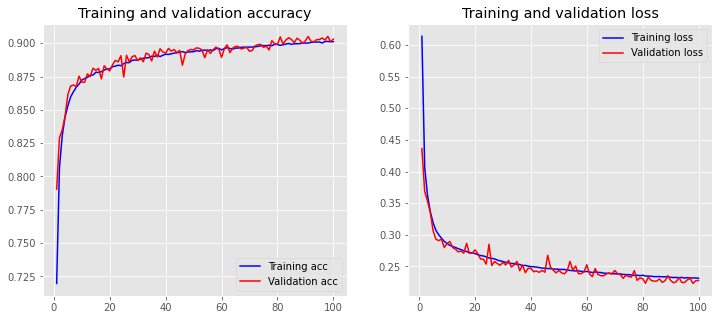

In [21]:
# Visualing Training and Testing accuracy + loss
plot_history(history)